# CMUBTG W05: Regression

![](https://gallery.mailchimp.com/2f77ab610640a97c09a7c2193/images/900c307a-ac15-4dd9-9f1b-4b758849ba2a.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
rng = np.random.RandomState(0)

X = 5 * rng.rand(10000, 1)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

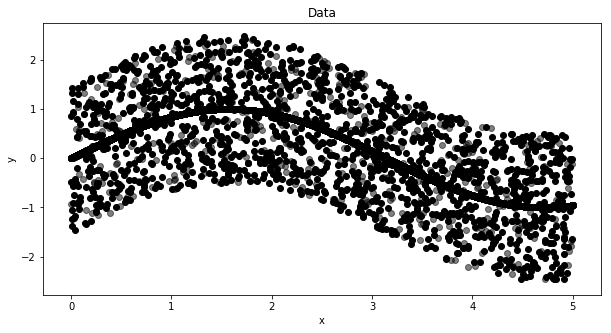

In [4]:
##################
### Plot  Data ###
##################

# set display size of plot
figure = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)

# plot the training points
ax.scatter(X_train, y_train, c='k')

# plot the testing points
ax.scatter(X_test, y_test, c='k', alpha=0.5)

# plot aesthetics
ax.set_title("Data")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

## Regressors

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [6]:
names = ["Linear Regression",
         "K-Nearest Neighbors",
         "Decision Tree",
         "AdaBoost",
         "Neural Net"]

regressors = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5),
    DecisionTreeRegressor(max_depth=5),
    AdaBoostRegressor(),
    MLPRegressor(alpha=1)
]

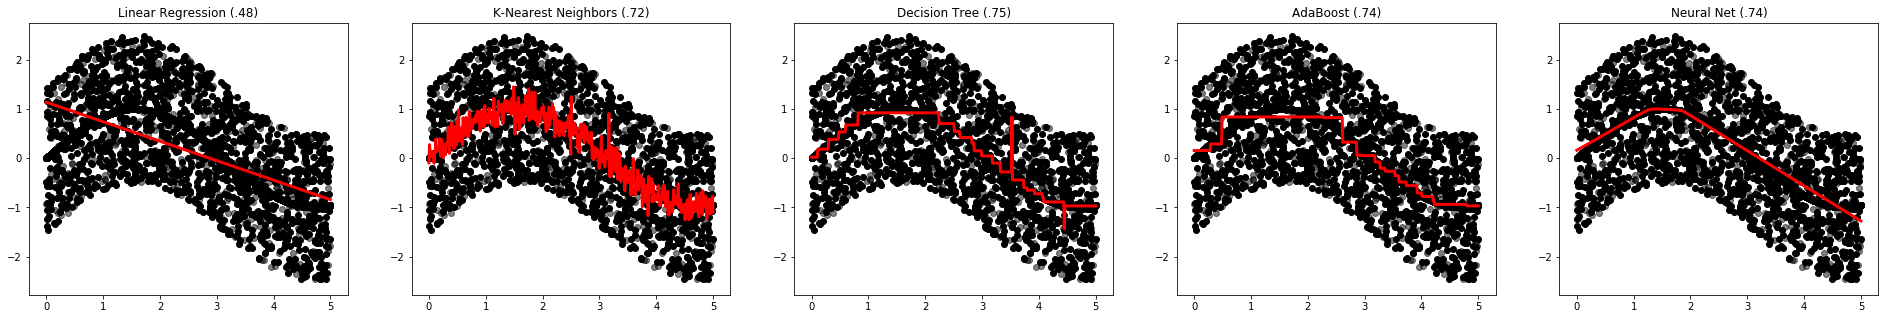

In [7]:
#######################
### Regress on Data ###
#######################

# reset plot
figure = plt.figure(figsize=(40, 5))

# iterate over regressors
i = 1
for name, reg in zip(names, regressors):
    ax = plt.subplot(1, len(regressors) + 1, i)
    
    # fit the regressor
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    
    # make predictions using the testing set
    y_pred = reg.predict(T)

    # plot the training points
    ax.scatter(X_train, y_train, c='k')
    
    # plot the testing points
    ax.scatter(X_test, y_test, c='k', alpha=0.5)
    
    # plot regression line
    ax.plot(T, y_pred, c='r', linewidth=3)
    
    # plot title and score
    ax.set_title(name + " (" + ('%.2f' % score).lstrip('0') + ")")
    
    i += 1

plt.show()